<a href="https://colab.research.google.com/github/damerei/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
5978,32,43000.0,0,125,6.2,1,1,2008,1
1561,74,17900.0,0,133,2.7,1,1,2007,1
3790,49,7999.0,3,91,1.6,3,1,2008,0
2294,76,2000.0,3,49,1.3,3,1,1974,2
1478,5,42000.0,3,59,4.4,3,1,2009,2
285,17,3499.0,1,104,0.8,3,1,2008,0
8427,76,5000.0,0,18,1.6,1,1,1989,1
2707,52,12400.0,3,52,1.6,3,1,2013,0
4284,70,13333.0,0,194,3.0,3,1,2007,1
6037,77,9900.0,5,300,2.5,0,1,2007,0


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [0]:
X = df.drop(columns=['price'])
y = df['price']

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6796, 8) (1699, 8) (6796,) (1699,)


## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [6]:
features = X_train.columns
X = X_train[features]
y = y_train
model = LinearRegression()
model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [7]:

print('Features:',features)
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Features: Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive'],
      dtype='object')
Coefficients: 
 [  -35.16726588 -1770.98509064   -40.26859658   273.03540784
 -1111.08031708  4535.06013378  1140.73124767  8292.04613874]
Intercept: 
 -2269355.0772314165


## 1.5 Use the test data to make predictions.

In [8]:
X_test['prediction'] = model.predict(X_test[features])

X_test['prediction'].head()


8221    19200.266393
4552     5355.002844
1535    26205.124150
4228    12478.550584
5623    24539.049938
Name: prediction, dtype: float64

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [9]:
print('Root Mean Square:',np.sqrt(mean_squared_error(y_true=y_test, y_pred=X_test['prediction'])))
print('R2_Score:',r2_score(y_test,X_test['prediction']))



Root Mean Square: 21394.43524600266
R2_Score: 0.29213322373743256


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

A fairly high weight is being placed on the year variable, though the two strongest determinants seem to be the "drive" and the "registration". 

## 1.8 How should we interpret the Root Mean Square Error?

That the error is overall quite high. The mean square error is the pointwise sum of the residuals between data and its estimator; RMSE is its square root. 

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

The R-squared is the coefficient of determination, a measure of global fit across variables; at a value of .29 it is quite low. 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df['price'])

target = df['ln_price']

In [11]:
X.columns

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive'],
      dtype='object')

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

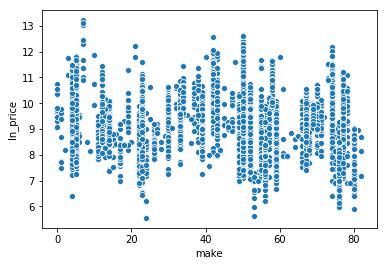

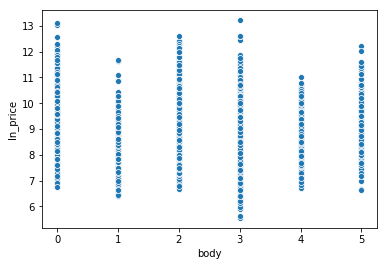

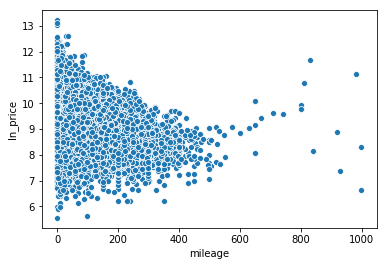

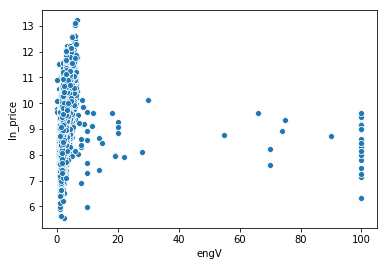

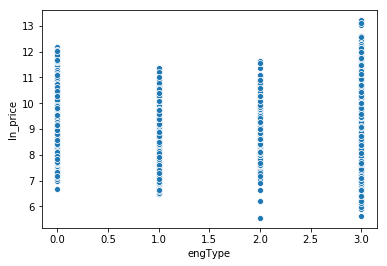

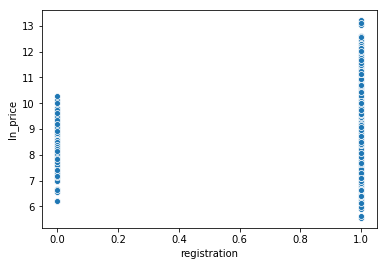

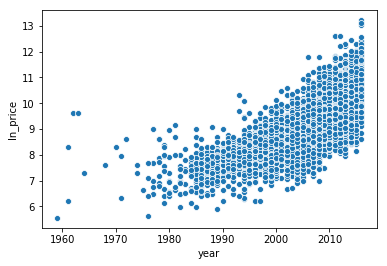

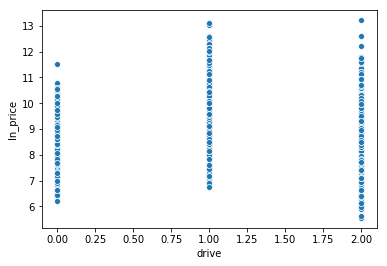

In [12]:
for feature in X.columns.tolist(): 
  sns.scatterplot(x=feature, y=target, data=df)
  plt.show()
  
  

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [14]:
df['year_sq'] = df['year']**2


0       4040100
1       4044121
2       4032064
3       4048144
4       4052169
5       4012009
6       4044121
7       4048144
8       4040100
9       4064256
10      4044121
11      4048144
12      4048144
13      4024036
14      4064256
15      4064256
16      4052169
17      4052169
18      4064256
19      4064256
20      4064256
21      4064256
22      4028049
23      4064256
24      4056196
25      4060225
26      4064256
27      4028049
28      3996001
29      4032064
         ...   
8465    4052169
8466    3904576
8467    4052169
8468    4056196
8469    4048144
8470    4048144
8471    4052169
8472    4004001
8473    4028049
8474    4024036
8475    4004001
8476    4048144
8477    4028049
8478    4032064
8479    4048144
8480    4024036
8481    4020025
8482    4028049
8483    4028049
8484    4020025
8485    4020025
8486    4024036
8487    3984016
8488    4044121
8489    4028049
8490    4044121
8491    3944196
8492    4032064
8493    4032064
8494    4028049
Name: year_sq, Length: 8

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [17]:
X = df.drop(columns=['price'])
y = df['ln_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

features = X_train.columns
X = X_train[features]
y = y_train
model = LinearRegression()
model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
print('Features:',features)
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Features: Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive', 'ln_price', 'year_sq'],
      dtype='object')
Coefficients: 
 [-1.49228672e-16  7.59700462e-16  1.10368393e-18 -1.76981737e-16
  1.68476203e-16 -1.45622233e-15 -2.47680957e-16 -7.24090615e-17
  1.00000000e+00 -2.16840434e-19]
Intercept: 
 1.3660184094987926e-12


In [19]:
X_test['prediction'] = model.predict(X_test[features])

X_test['prediction'].head()


8221    10.146434
4552     9.137770
1535     8.779557
4228     8.999619
5623     9.305560
Name: prediction, dtype: float64

In [20]:
print('Root Mean Square:',np.sqrt(mean_squared_error(y_true=y_test, y_pred=X_test['prediction'])))
print('R2_Score:',r2_score(y_test,X_test['prediction']))




Root Mean Square: 8.356002622523854e-15
R2_Score: 1.0


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient